## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [7]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df.drop(['date', 'view','sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

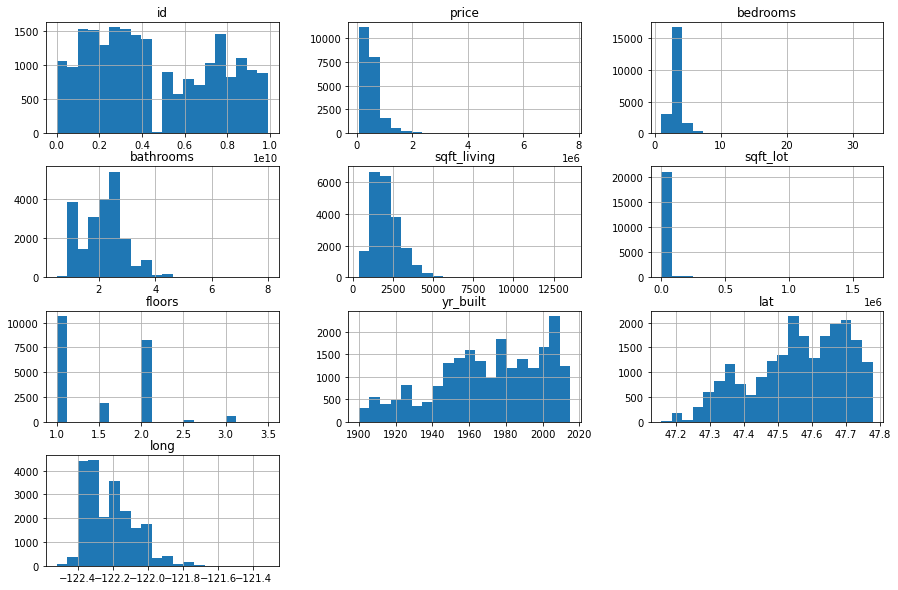

In [11]:
df.hist(bins=20, figsize=(15,10))

In [12]:
X, y = df.drop('price', axis=1), df['price']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<AxesSubplot:xlabel='long', ylabel='lat'>

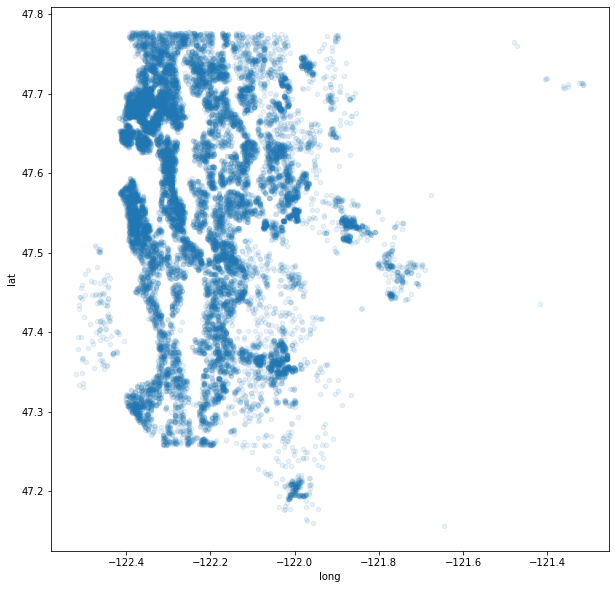

In [14]:
df.plot(kind='scatter', x='long', y='lat', alpha=0.1, figsize=(10,10))

In [15]:
df['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [16]:
df['waterfront'].fillna('-1', inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


In [18]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','yr_built',
         'waterfront', 'condition', 'grade']
df = df[feats]
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,1951,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953,-0.057305,0.264306,-0.051432,...,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670,0.004858,-0.002127,-0.049463,...,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173,-0.011744,0.063629,-0.075933,...,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152,-0.020362,0.104637,-0.063984,...,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946,-0.007191,0.021459,0.037871,...,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193,-0.000505,0.020797,-0.055337,...,0.118735,0.054276,0.021257,-0.006230,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000,0.010033,-0.024487,-0.066977,...,0.098762,0.046874,0.004692,-0.011814,-0.041843,-0.128815,-0.313501,-0.211966,0.199844,0.220104
waterfront_NO,-0.057305,0.004858,-0.011744,-0.020362,-0.007191,-0.000505,0.010033,1.000000,-0.226888,0.001390,...,-0.015425,-0.014870,0.008924,0.002474,0.004704,-0.007863,-0.000006,0.007882,0.006494,-0.005141
waterfront_YES,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,-0.024487,-0.226888,1.000000,-0.000954,...,0.068410,0.082899,-0.002025,-0.000561,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487
condition_Fair,-0.051432,-0.049463,-0.075933,-0.063984,0.037871,-0.055337,-0.066977,0.001390,-0.000954,1.000000,...,-0.012220,-0.005730,-0.002186,-0.000606,0.056160,0.065184,0.076994,0.004637,-0.040504,-0.029848


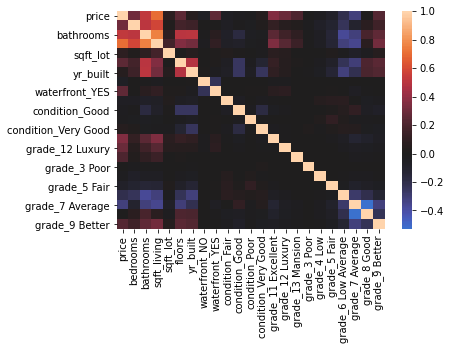

In [21]:
sns.heatmap(df.corr(), center=0);

In [22]:
df.corr()['price'].sort_values(ascending=False)

price                  1.000000
sqft_living            0.701917
bathrooms              0.525906
grade_11 Excellent     0.357589
bedrooms               0.308787
grade_12 Luxury        0.291068
waterfront_YES         0.264306
floors                 0.256804
grade_9 Better         0.235859
grade_13 Mansion       0.211806
sqft_lot               0.089876
condition_Very Good    0.057531
yr_built               0.053953
grade_8 Good           0.004576
grade_3 Poor          -0.005155
condition_Poor        -0.019886
condition_Good        -0.030759
grade_4 Low           -0.031618
condition_Fair        -0.051432
waterfront_NO         -0.057305
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'waterfront_NO'}>,
        <AxesSubplot:title={'center':'waterfront_YES'}>,
        <AxesSubplot:title={'center':'condition_Fair'}>],
       [<AxesSubplot:title={'center':'condition_Good'}>,
        <AxesSubplot:title={'center':'condition_Poor'}>,
        <AxesSubplot:title={'center':'condition_Very Good'}>,
        <AxesSubplot:title={'center':'grade_11 Excellent'}>,
        <AxesSubplot:title={'center':'grade_12 Luxury'}>],
       [<AxesSubplot:title={'center':'grade_13 Mansion'}>,
        <AxesSubplot:title={'center':'grade_3 Poor'}>,
        <AxesSubplot:title={'center':'grade_4 Low'}>,
        

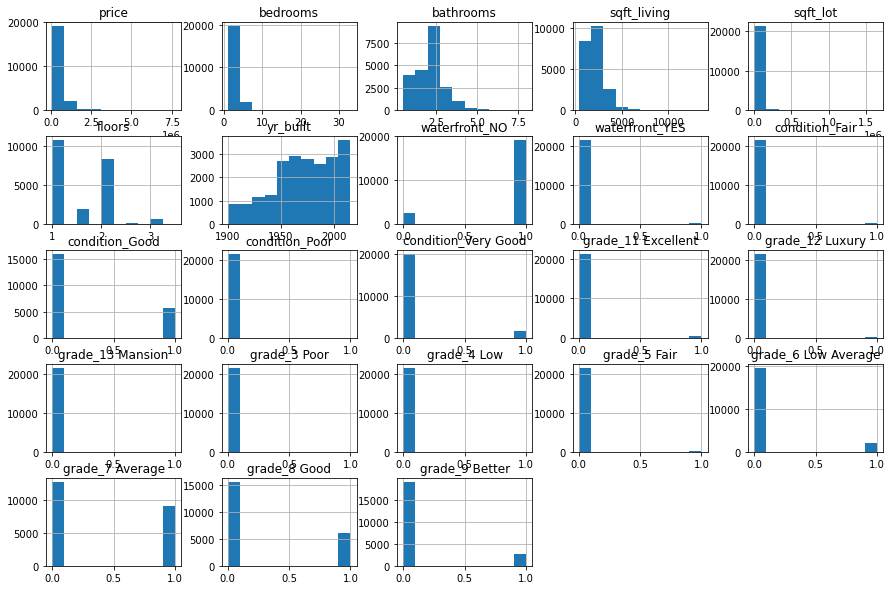

In [23]:
df.hist(figsize=(15,10))

In [24]:
model = sm.OLS(y, X).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
y.hist()

In [ ]:
y_scld = np.log(y)
y_scld.hist(bins=5)
y = y_scld

In [ ]:
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

In [ ]:
df.drop(['waterfront_NO', 'sqft_lot'], axis=1, inplace=True)

In [ ]:
X, y = df.drop('price', axis=1), df['price']

In [ ]:
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary()

In [ ]:
df.drop(['condition_Poor','condition_Fair'], axis=1, inplace=True)

In [ ]:
X, y = df.drop('price', axis=1), df['price']

In [ ]:
X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
model4.summary()

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit(X)

X_scaled = ss.transform(X)

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled, y)

In [ ]:
lr.score(X_scaled, y)

In [ ]:
y_hat = lr.predict(X_scaled)
y_hat

In [ ]:
resid = (y - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

In [ ]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
sns.distplot(model4.resid)